In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

from dirichlet_func import my_dirichlet_torch

In [2]:
def plot_dirichlet_2d(corners, size, alpha, ax):
    points = corners
    # create convex hull from points
    hull = ConvexHull(points)
    corners = points[hull.vertices] # which of the points actually constitute the convex hull
    centroid = [corners[:,0].mean(), corners[:,1].mean()] # compute centroid
    
    if len(points) != len(corners):
        alpha = alpha[:len(corners)]  # adjust alpha so it fits the number of corners
    
    # get dirichlet samples
    dirxy = my_dirichlet_torch(alpha,size,points) 
    # plot
    for simplex in hull.simplices:
        p1 = ax.plot(points[simplex, 0], points[simplex, 1], 'b-', alpha=0.2, label='Convex hull')
    
    p2 = ax.scatter(corners[:, 0], corners[:, 1], marker='o', color='b', label='Corners')
    p3 = ax.scatter(dirxy[:,0], dirxy[:,1], marker='.', color='r', label='Samples')
    p4 = ax.scatter(centroid[0], centroid[1], marker='o', color='g', label='Centroid')
    ax.set_title(f'alpha: {alpha}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    labels = ['Archetypes', 'Convex hull', 'Samples', 'Centroid']
    return [p2, p1[0],p3,p4], labels

### single plot

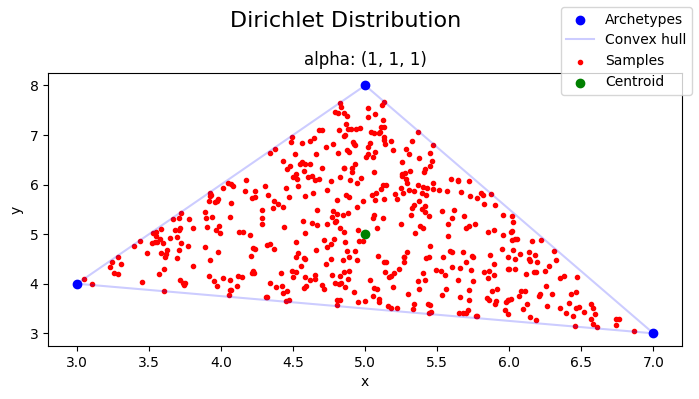

In [3]:
# corners of the convex hull
corners = torch.tensor([[3,4], [5,8], [7,3]]).float()
# number of samples
size=500
# alpha values
alpha = (1,1,1)

# plot
fig, ax = plt.subplots(1, 1,figsize=(7, 4))

plots, labels = plot_dirichlet_2d(corners, size, alpha, ax)

fig.legend(plots, labels, loc="upper right")
fig.suptitle('Dirichlet Distribution', fontsize=16)
fig.tight_layout(pad=1.0)
#plt.subplots_adjust(right=0.85)
plt.savefig(f"plots/dirichlet_ex_2d_1.png", 
                bbox_inches='tight', facecolor ="w", dpi=300)
plt.show()

### comparison plot

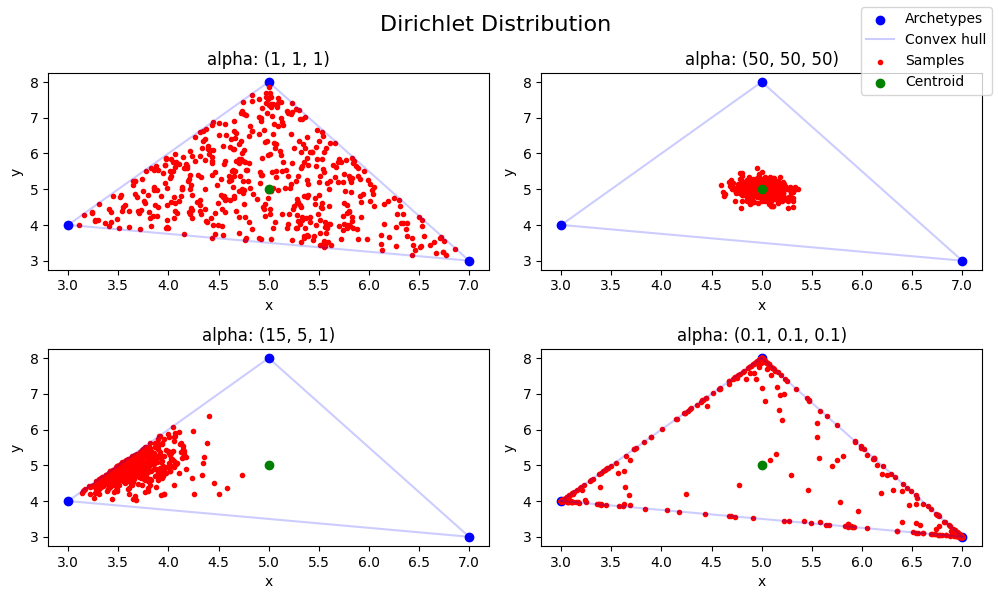

In [4]:
# corners of the convex hull
corners = torch.tensor([[3,4], [5,8], [7,3]]).float()
# number of samples
size=500
# alpha values
alphas = [(1,1,1), (50,50,50), (15,5,1), (.1,.1,.1)]

# plot
fig, axs = plt.subplots(2, 2,figsize=(10, 6))
figures = [(0,0), (0,1),(1,0),(1,1)]

for i in range(4):
    alpha = alphas[i]
    figure = figures[i]
    plots, labels = plot_dirichlet_2d(corners, size, alpha, axs[figure])
    
fig.legend(plots, labels, loc="upper right")
fig.suptitle('Dirichlet Distribution', fontsize=16)
fig.tight_layout(pad=1.0)
#plt.subplots_adjust(right=0.85)
plt.savefig(f"plots/dirichlet_ex_2d_2.png", 
                bbox_inches='tight', facecolor ="w", dpi=300)
plt.show()

# dirichlet on the sphere

In [5]:
from plot_sphere_func import *
from eval_model_plots import crop_sphere

C:\Users\frede\AppData\Roaming\Python\Python310\site-packages\mpl_toolkits\mplot3d\proj3d.py:140: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
C:\Users\frede\AppData\Roaming\Python\Python310\site-packages\mpl_toolkits\mplot3d\proj3d.py:140: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.

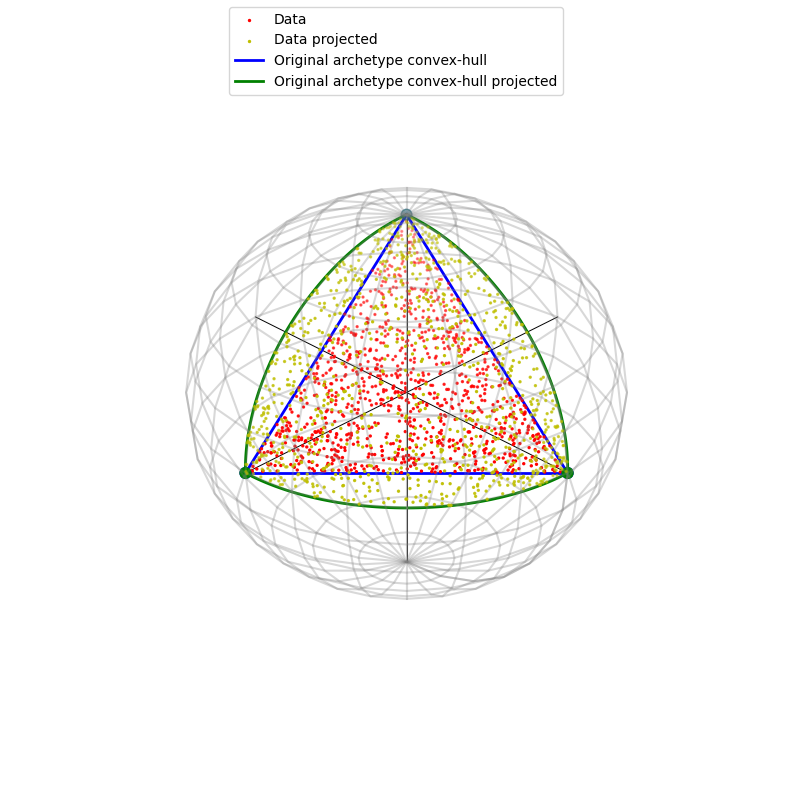

In [6]:
size=1000 # number of samples
alpha = (1,1,1) # alpha values
archetypes = torch.tensor([[1,0,0],[0,0,1],[0,-1,0]]).float() 
X = my_dirichlet_torch(alpha,size,archetypes)
Xp = proj_to_sphere(my_dirichlet_torch(alpha,size,archetypes))

# Plot example 
[fig, ax] = plot_sphere(shape=(8, 8),view='front')
plot_samples(X, ax, color='r', label='Data')
plot_samples(Xp, ax, color='y', label='Data projected')
plot_archetypes(archetypes, ax, color='b', label='Original archetype convex-hull')
plot_archetypes_on_sphere(archetypes, ax, color='g', label='Original archetype convex-hull projected')

#fig.suptitle('Original Archetypes \n and data samples', fontsize=16)
fig.legend(loc="upper center")
fig.tight_layout(pad=1.0)
filename = f"plots/sphere datasample front.png"
plt.savefig(filename, bbox_inches='tight', facecolor ="w", dpi=300)
plt.show()
# crop image
crop_sphere(filename)

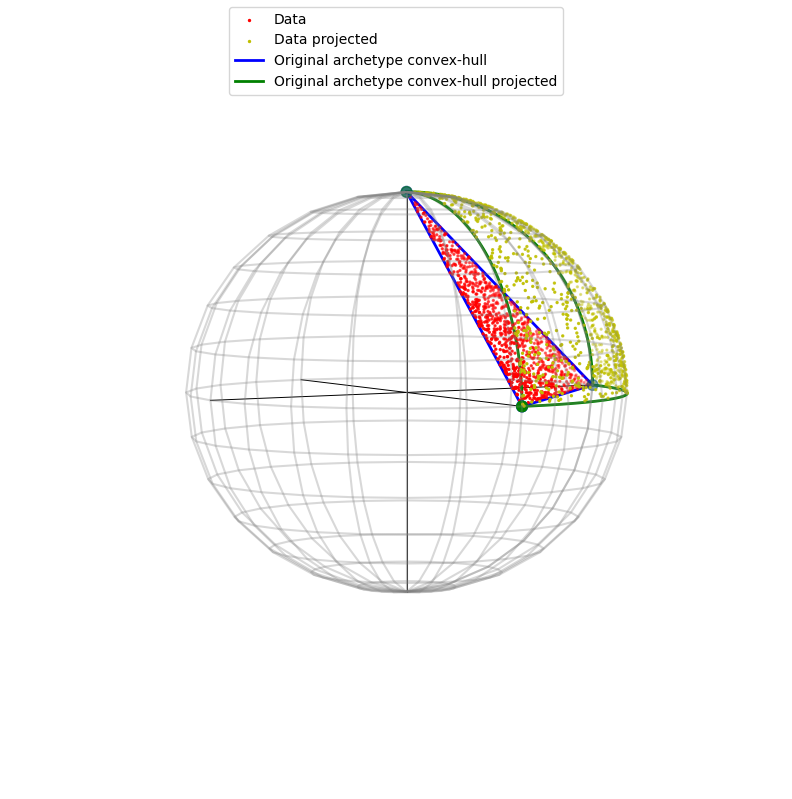

In [7]:
# Plot example 
[fig, ax] = plot_sphere(shape=(8, 8),view='side')
plot_samples(X, ax, color='r', label='Data')
plot_samples(Xp, ax, color='y', label='Data projected')
plot_archetypes(archetypes, ax, color='b', label='Original archetype convex-hull')
plot_archetypes_on_sphere(archetypes, ax, color='g', label='Original archetype convex-hull projected')

#fig.suptitle('Original Archetypes \n and data samples', fontsize=16)
fig.legend(loc="upper center")
fig.tight_layout(pad=1.0)
filename = f"plots/sphere datasample side.png"
plt.savefig(filename, bbox_inches='tight', facecolor ="w", dpi=300)
plt.show()
# crop image
crop_sphere(filename)